# The Book-Crossing dataset comprises 3 files.

### Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

### Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

### Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
users = pd.read_csv(r"C:\Users\91730\OneDrive\Desktop\Projects - ExcelR\Dataset\Users.csv")
books = pd.read_csv(r"C:\Users\91730\OneDrive\Desktop\Projects - ExcelR\Dataset\Books.csv")
ratings = pd.read_csv(r"C:\Users\91730\OneDrive\Desktop\Projects - ExcelR\Dataset\Ratings.csv")

# Descriptive Statistics

### Users

In [3]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
users.shape

(278858, 3)

### Books

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.shape

(271360, 8)

### Ratings

In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
ratings.shape

(1149780, 3)

# Exploratory data analysis

### Users

In [9]:
print(users.info())

print("No. of Unique users in the Dataset is",len(users['User-ID'].unique()))

print("No. of Null values in the Dataset is",users.isnull().sum().sum())

print("No. of Duplicates values in the Dataset is",users.duplicated().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None
No. of Unique users in the Dataset is 278858
No. of Null values in the Dataset is 110762
No. of Duplicates values in the Dataset is 0


In [10]:
users['Age'].value_counts()

24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
168.0       1
132.0       1
159.0       1
186.0       1
127.0       1
Name: Age, Length: 165, dtype: int64

In [11]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### Books

In [12]:
print(books.info())

print("No. of Unique Book-Title in the Dataset is",len(books['Book-Title'].unique()))

print("No. of Unique Book-Author in the Dataset is",len(books['Book-Author'].unique()))

print("No. of Unique Year-Of-Publication in the Dataset is",len(books['Year-Of-Publication'].unique()))

print("No. of Null values in the Dataset is",books.isnull().sum().sum())

print("No. of Duplicates values in the Dataset is",books.duplicated().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
No. of Unique Book-Title in the Dataset is 242135
No. of Unique Book-Author in the Dataset is 102024
No. of Unique Year-Of-Publication in the Dataset is 202
No. of Null values in the Dataset is 6
No. of Duplicates values in the Dataset is 0


In [13]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [14]:
vis_book = pd.DataFrame(books['Book-Title'].value_counts())
vis_book

,Book-Title
Selected Poems,27
Little Women,24
Wuthering Heights,21
The Secret Garden,20
Dracula,20
...,...
What Every Kid Should Know,1
The Seventh Enemy (A Brady Coyne Mystery),1
A Brace of Skeet,1
"The Yellow Admiral (O'Brian, Patrick, Aubrey/Maturin Novels, 18.)",1


In [15]:
vis_author = pd.DataFrame(books['Book-Author'].value_counts())
vis_author

,Book-Author
Agatha Christie,632
William Shakespeare,567
Stephen King,524
Ann M. Martin,423
Carolyn Keene,373
...,...
Linda Jackson,1
Artiste C. Arthur,1
Emily Pearl Kingsley,1
Jean Cassels,1


In [16]:
vis_year = pd.DataFrame(books['Year-Of-Publication'].value_counts())
vis_year

,Year-Of-Publication
2002,13903
2001,13715
1999,13414
2000,13373
1998,12116
...,...
1924,1
2012,1
1927,1
1931,1


### Ratings

In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [18]:
ratings.isnull().sum().sum()

0

In [19]:
ratings.duplicated().sum().sum()

0

In [20]:
ratings['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

In [21]:
ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [22]:
ratings['Book-Rating'].mean()

2.8669501991685364

# Dealing with null values

#### When we have such a large number of missing values present in our data, we have 2 options.

1) Deletion : Deletion of rows (if you have large volume of data)
              
              Deletion of columns (if > 50% of data is null)

2) Imputation : for numeric column -- use mean/median/mode
                
                for categorical columns -- use mode or ration

### Users

In [23]:
# Column wise null values
total_null = users.isnull().sum().sort_values(ascending=False)  
percent_null = ((users.isnull().sum() / users.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Age,110762,39.719857
User-ID,0,0.000000
Location,0,0.000000


In [24]:
# Dropping age values above 100
outliners_age = users[users['Age']>100]

In [25]:
outliners_age.shape

(366, 3)

In [26]:
users = users.drop(outliners_age.index[0:len(outliners_age)])
users.shape

(278492, 3)

### Books

In [27]:
# Column wise null values
total_null = books.isnull().sum().sort_values(ascending=False)  
percent_null = ((books.isnull().sum() / books.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Image-URL-L,3,0.001106
Publisher,2,0.000737
Book-Author,1,0.000369
ISBN,0,0.000000
Book-Title,0,0.000000
Year-Of-Publication,0,0.000000
Image-URL-S,0,0.000000
Image-URL-M,0,0.000000


In [28]:
# Dropping all the nulls values in this dataset because there are very less null values which will not affect our model so we are better without them.
books = books.dropna()

In [29]:
# Column wise null values
total_null = books.isnull().sum().sort_values(ascending=False)  
percent_null = ((books.isnull().sum() / books.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
ISBN,0,0.0
Book-Title,0,0.0
Book-Author,0,0.0
Year-Of-Publication,0,0.0
Publisher,0,0.0
Image-URL-S,0,0.0
Image-URL-M,0,0.0
Image-URL-L,0,0.0


### Ratings

In [30]:
# Column wise null values
total_null = ratings.isnull().sum().sort_values(ascending=False)  
percent_null = ((ratings.isnull().sum() / ratings.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
User-ID,0,0.0
ISBN,0,0.0
Book-Rating,0,0.0


#### No null Values

# Data - Preprocessing - 1 (for further Imputation)

In [31]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [32]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [33]:
df = ratings.merge(books, left_on = "ISBN", right_on = "ISBN", how = "left")

In [34]:
df.shape

(1149780, 10)

In [35]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Book-Title,118651,10.319452
Book-Author,118651,10.319452
Year-Of-Publication,118651,10.319452
Publisher,118651,10.319452
Image-URL-S,118651,10.319452
Image-URL-M,118651,10.319452
Image-URL-L,118651,10.319452
User-ID,0,0.000000
ISBN,0,0.000000
Book-Rating,0,0.000000


In [36]:
users[['City', 'State', 'Country']] = users['Location'].str.split(', ', expand=True, n=2)
users[['City', 'State', 'Country']] = users[['City', 'State', 'Country']].fillna("Not specified")

In [37]:
users

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,tennessee,usa


## Age

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1149780 non-null  int64 
 1   ISBN                 1149780 non-null  object
 2   Book-Rating          1149780 non-null  int64 
 3   Book-Title           1031129 non-null  object
 4   Book-Author          1031129 non-null  object
 5   Year-Of-Publication  1031129 non-null  object
 6   Publisher            1031129 non-null  object
 7   Image-URL-S          1031129 non-null  object
 8   Image-URL-M          1031129 non-null  object
 9   Image-URL-L          1031129 non-null  object
dtypes: int64(2), object(8)
memory usage: 96.5+ MB


In [39]:
age = users['Age']

In [40]:
if age is not None:
    print(age)
else:
    # no need for else: really if it doesn't contain anything useful
    pass

0          NaN
1         18.0
2          NaN
3         17.0
4          NaN
          ... 
278853     NaN
278854    50.0
278855     NaN
278856     NaN
278857     NaN
Name: Age, Length: 278492, dtype: float64


In [41]:
def age_group(age):
    
    if age < 25:
        x = 'Children'
    elif age >= 15 and age<25:
        x = 'Youth'
    elif age >= 35 and age < 65:
        x = 'Adult'
    else:
        x = 'Senior Citizens'
    return x

In [42]:
 users['Age_group']=users['Age'].apply(lambda x: age_group(x))

In [43]:
users.head()

,User-ID,Location,Age,City,State,Country,Age_group
0,1,"nyc, new york, usa",NaN,nyc,new york,usa,Senior Citizens
1,2,"stockton, california, usa",18.0,stockton,california,usa,Children
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia,Senior Citizens
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal,Children
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom,Senior Citizens


In [44]:
users["Age"].interpolate(inplace=True)

In [45]:
users["Age"] = users["Age"].fillna(18)

In [46]:
users['Age']= users['Age'].fillna(0).astype('int')

In [47]:
users.head()

,User-ID,Location,Age,City,State,Country,Age_group
0,1,"nyc, new york, usa",18,nyc,new york,usa,Senior Citizens
1,2,"stockton, california, usa",18,stockton,california,usa,Children
2,3,"moscow, yukon territory, russia",17,moscow,yukon territory,russia,Senior Citizens
3,4,"porto, v.n.gaia, portugal",17,porto,v.n.gaia,portugal,Children
4,5,"farnborough, hants, united kingdom",39,farnborough,hants,united kingdom,Senior Citizens


In [48]:
df = df.merge(users, left_on = "User-ID", right_on = "User-ID",how = "left")

In [49]:
df["Age"] = df["Age"].round(0)

In [50]:
(df['Age']>100).sum()

0

In [51]:
df.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,City,State,Country,Age_group
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",34.0,tyler,texas,usa,Senior Citizens
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",25.0,seattle,washington,usa,Senior Citizens
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0,h,new south wales,australia,Children
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0,rijeka,n/a,croatia,Children
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0,rijeka,n/a,croatia,Children
5,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,"paris, n/a, france",37.0,paris,n/a,france,Adult
6,276736,3257224281,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"salzburg, salzburg, austria",16.0,salzburg,salzburg,austria,Senior Citizens
7,276737,0600570967,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"sydney, new south wales, australia",14.0,sydney,new south wales,australia,Children
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"torrance, california, usa",33.0,torrance,california,usa,Senior Citizens
9,276745,342310538,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"berlin, berlin, germany",27.0,berlin,berlin,germany,Senior Citizens


In [52]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Book-Title,118651,10.319452
Book-Author,118651,10.319452
Year-Of-Publication,118651,10.319452
Publisher,118651,10.319452
Image-URL-S,118651,10.319452
Image-URL-M,118651,10.319452
Image-URL-L,118651,10.319452
Location,3424,0.297796
Age,3424,0.297796
City,3424,0.297796


## Year-Of-Publication

In [53]:
df['Year-Of-Publication'] = df['Year-Of-Publication'].fillna(0).astype('int')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1149780 non-null  int64  
 1   ISBN                 1149780 non-null  object 
 2   Book-Rating          1149780 non-null  int64  
 3   Book-Title           1031129 non-null  object 
 4   Book-Author          1031129 non-null  object 
 5   Year-Of-Publication  1149780 non-null  int32  
 6   Publisher            1031129 non-null  object 
 7   Image-URL-S          1031129 non-null  object 
 8   Image-URL-M          1031129 non-null  object 
 9   Image-URL-L          1031129 non-null  object 
 10  Location             1146356 non-null  object 
 11  Age                  1146356 non-null  float64
 12  City                 1146356 non-null  object 
 13  State                1146356 non-null  object 
 14  Country              1146356 non-null  object 
 15

In [55]:
# Dropping Year-Of-Publication Greater Than 2022
df.drop(df[df['Year-Of-Publication']>2022].index, inplace = True)

In [56]:
df.shape

(1149726, 16)

In [57]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Book-Title,118651,10.319937
Book-Author,118651,10.319937
Publisher,118651,10.319937
Image-URL-S,118651,10.319937
Image-URL-M,118651,10.319937
Image-URL-L,118651,10.319937
Location,3424,0.297810
Age,3424,0.297810
City,3424,0.297810
State,3424,0.297810


In [58]:
df.duplicated().sum()

0

In [59]:
df.head(8)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,City,State,Country,Age_group
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",34.0,tyler,texas,usa,Senior Citizens
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",25.0,seattle,washington,usa,Senior Citizens
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0,h,new south wales,australia,Children
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0,rijeka,n/a,croatia,Children
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0,rijeka,n/a,croatia,Children
5,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,"paris, n/a, france",37.0,paris,n/a,france,Adult
6,276736,3257224281,8,NaN,NaN,0,NaN,NaN,NaN,NaN,"salzburg, salzburg, austria",16.0,salzburg,salzburg,austria,Senior Citizens
7,276737,0600570967,6,NaN,NaN,0,NaN,NaN,NaN,NaN,"sydney, new south wales, australia",14.0,sydney,new south wales,australia,Children


In [60]:
df = df.drop(columns = ["City","State"])

In [61]:
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,Country,Age_group
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",34.0,usa,Senior Citizens
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",25.0,usa,Senior Citizens
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0,australia,Children
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0,croatia,Children
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0,croatia,Children


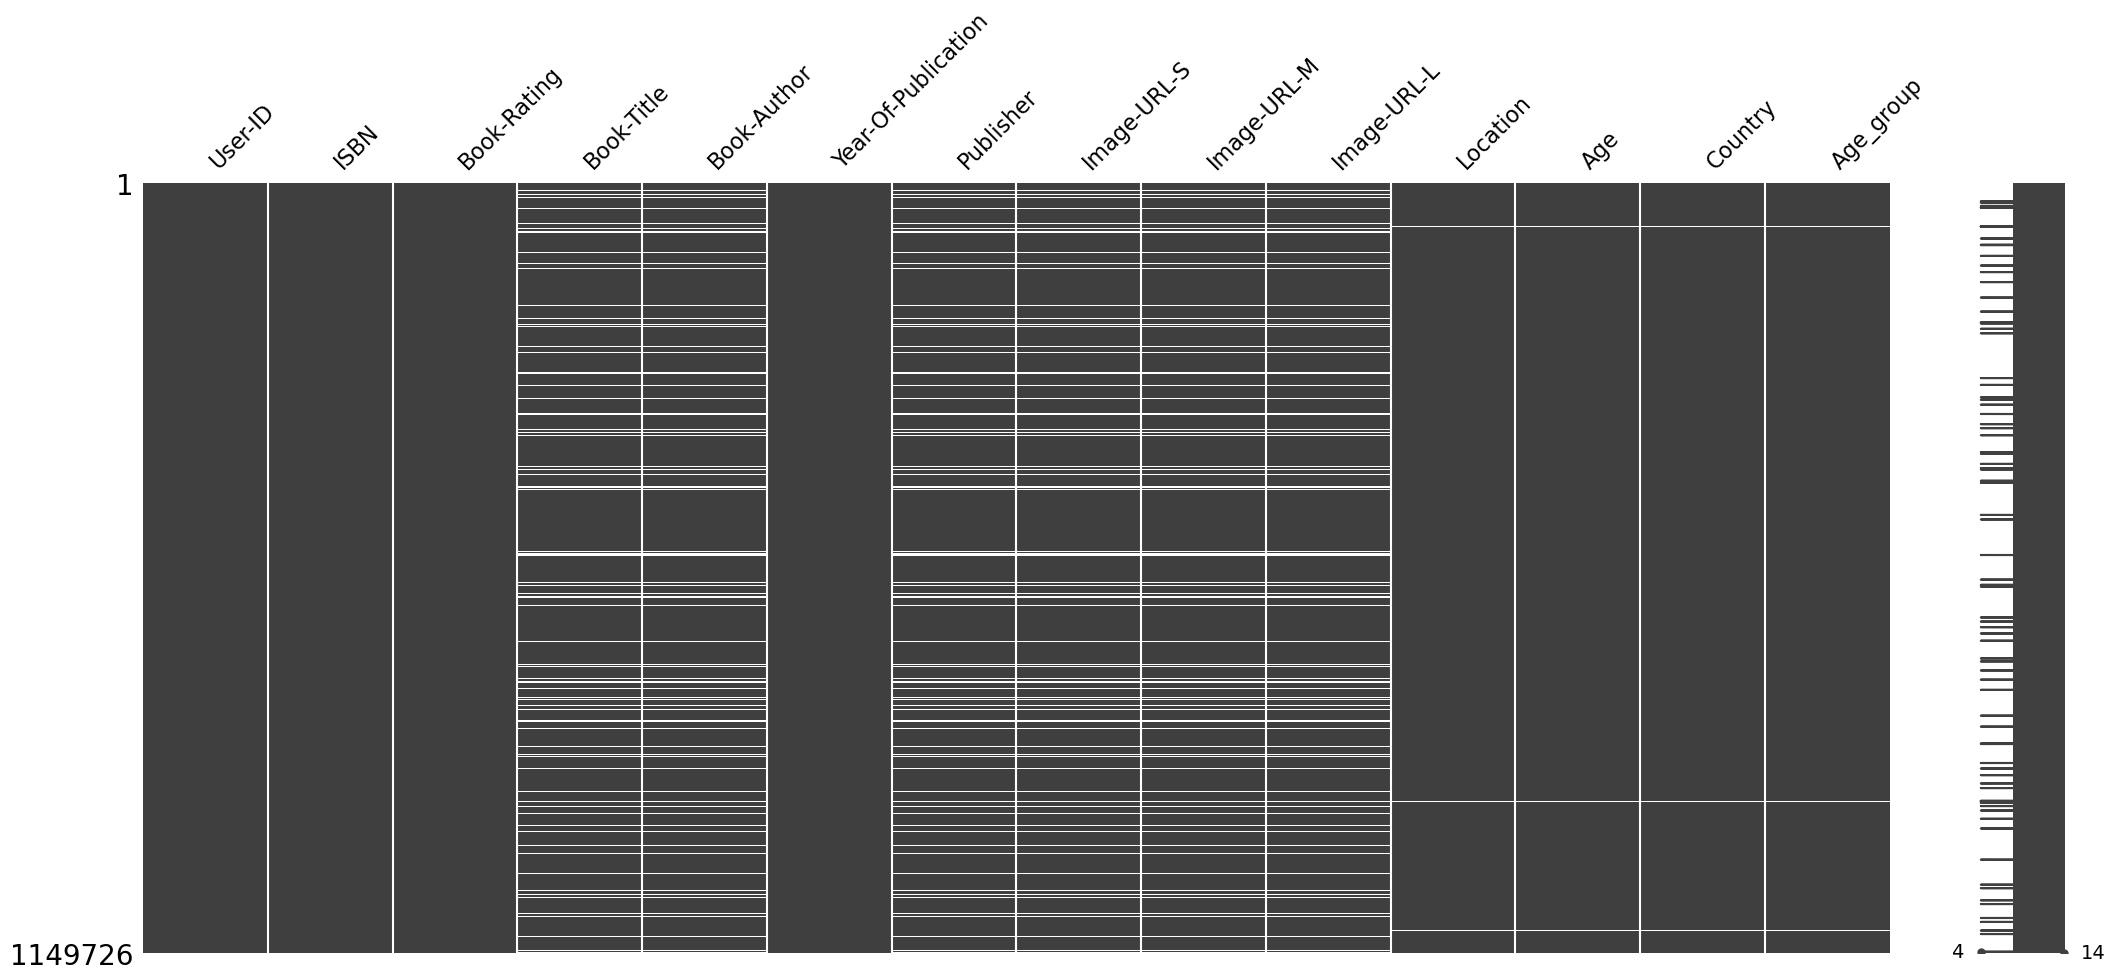

In [62]:
import missingno as mn
null_data = mn.matrix(df)

In [63]:
df = df.dropna()

# Descriptive statistics

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1028165.0,140565.724502,80489.769916,2.0,70415.0,141109.0,211426.0,278854.0
Book-Rating,1028165.0,2.841651,3.855137,0.0,0.0,0.0,7.0,10.0
Year-Of-Publication,1028165.0,1968.225970,230.956720,0.0,1992.0,1997.0,2001.0,2021.0
Age,1028165.0,36.236532,11.745207,0.0,28.0,34.0,44.0,100.0


# Data visualization

# Rating distribution

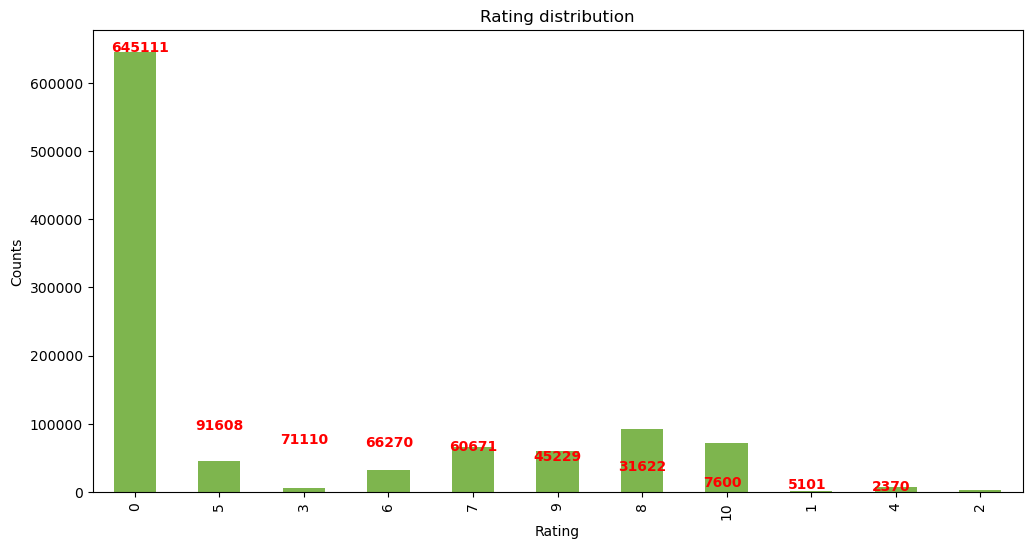

In [65]:
fig=plt.figure(figsize=(12,6))
df['Book-Rating'].value_counts(sort=False).plot(kind='bar',color='#7eb54e')
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Counts')

for index, value in enumerate(list(df['Book-Rating'].value_counts()[0:10].values)):
    plt.text(index-0.28, value+10, str(value), color = 'red', fontweight = 'bold', fontsize = 10)
plt.show()

#### -> Most frequently appeared ratings for books are '0' ratings by users
#### -> Least frequently appeared ratings for books are '2' ratings by users

#  List of 10 books with high number of ratings

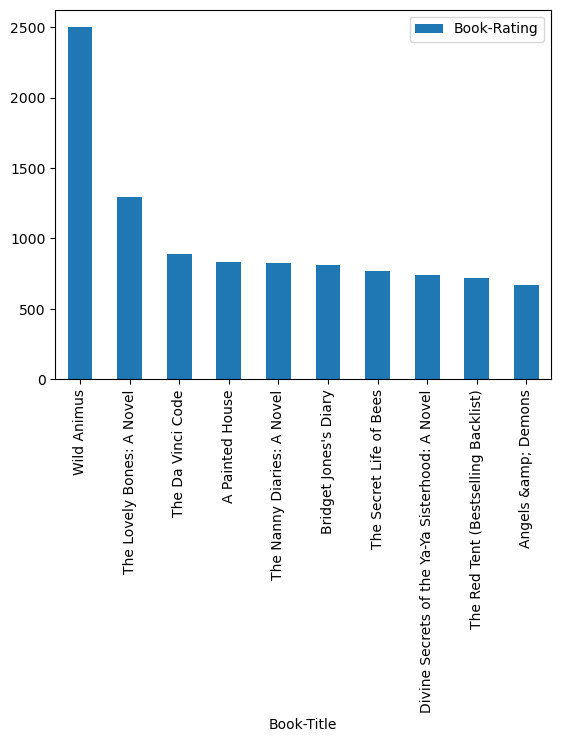

In [66]:
high_ratings=df.groupby('Book-Title')[['Book-Rating']].count()
high_ratings=high_ratings.nlargest(10,columns='Book-Rating')
high_ratings.plot(kind='bar')
plt.show()

#### Book wild Enthique en toc has received more than 2000 ratings

# List of 10 Authors with high number of ratings

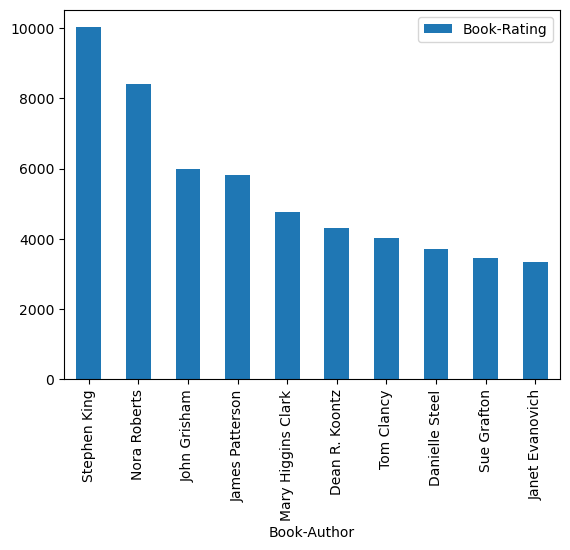

In [67]:
high_ratings1=df.groupby('Book-Author')[['Book-Rating']].count()
high_ratings=high_ratings1.nlargest(10,columns='Book-Rating')
high_ratings.plot(kind='bar')
plt.show()

# Bar Plot for top 10 authors mentioned in the dataframe

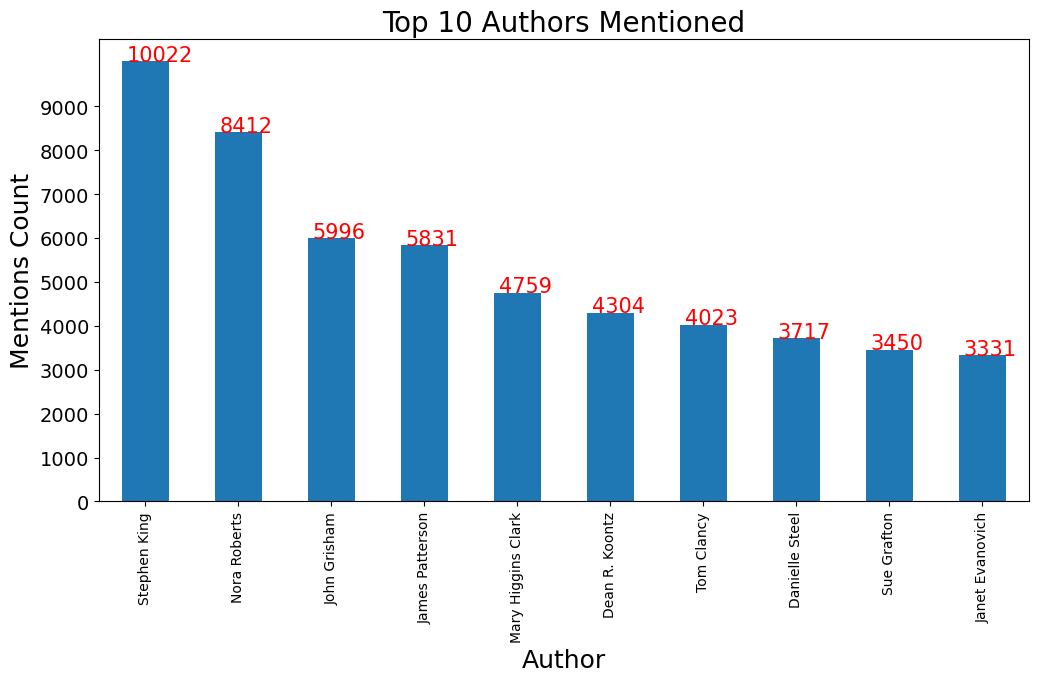

In [68]:
top10_mention = df['Book-Author'].value_counts()[:10]
plt.figure(figsize=[12,6])
top10_mention.plot(kind='bar')

plt.title("Top 10 Authors Mentioned", fontsize=20)
plt.xlabel('Author', fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel('Mentions Count', fontsize=18)
plt.yticks(np.arange(0,10000,1000), fontsize=14)

for index, value in enumerate(list(top10_mention.values)):
    plt.text(index-0.2, value+10, str(value), color = 'red', fontsize = 15)
plt.show()

#### -> Stephen king is most mentioned author among the other authors


# Top 10 Books Received Ratings with Highest Mentions

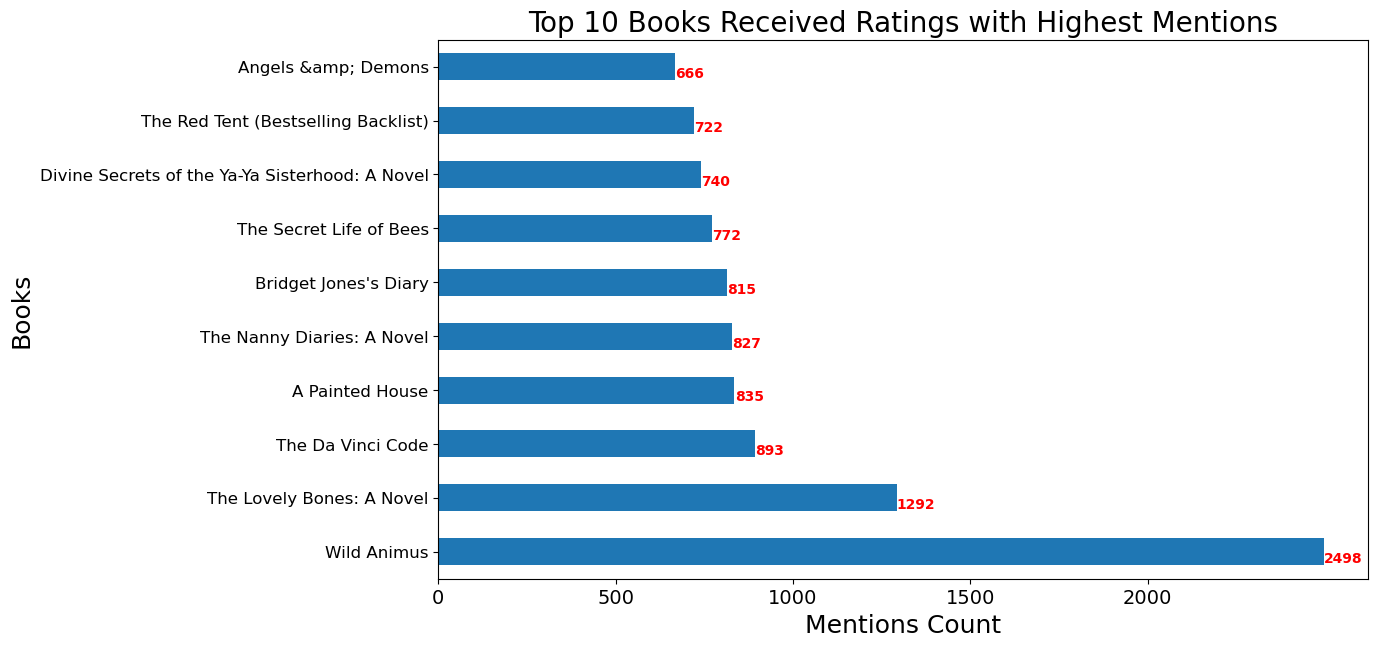

In [69]:
plt.figure(figsize=[12,7])
ax = df['Book-Title'].value_counts()[:10].plot.barh()

plt.title("Top 10 Books Received Ratings with Highest Mentions", fontsize=20)
plt.xlabel('Mentions Count', fontsize=18)
plt.xticks(np.arange(0,2500,500),fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Books', fontsize=18)

for index, value in enumerate(list(df['Book-Title'].value_counts()[:10].values)):
    ax.text(value+0.5, index-.2, str(value), color = 'red', fontweight = 'bold')
plt.show()

# Top 10 Book code received highest no of ratings 

<AxesSubplot: xlabel='ISBN'>

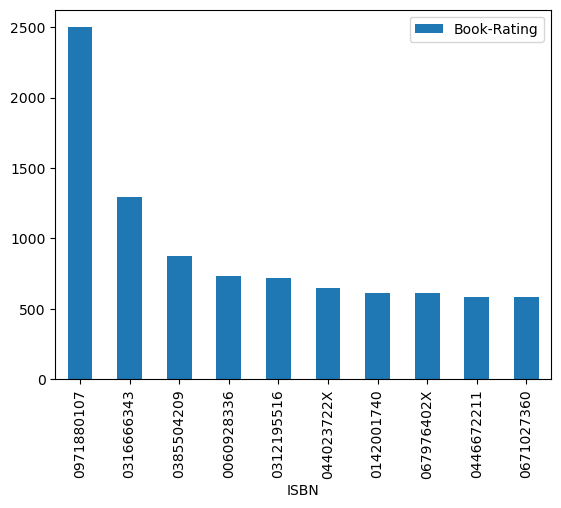

In [70]:
rating_count=pd.DataFrame(df.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False)[:10].plot(kind='bar')

#### -> book-code 971880107 has received most no of ratings

In [71]:
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,Country,Age_group
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",34.0,usa,Senior Citizens
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",25.0,usa,Senior Citizens
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0,australia,Children
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0,croatia,Children
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0,croatia,Children


In [72]:
df.shape

(1028165, 14)

In [73]:
location_df=df["Country"]

In [74]:
location_df

0                usa
1                usa
2          australia
3            croatia
4            croatia
             ...    
1149774          usa
1149775          usa
1149776       canada
1149777          usa
1149778          usa
Name: Country, Length: 1028165, dtype: object

In [75]:
location_df.value_counts()[:10]

usa               743460
canada             92806
united kingdom     31945
germany            27610
Not specified      24189
australia          18104
spain              14698
n/a                11176
france             10625
portugal            6970
Name: Country, dtype: int64

# Find out what is the over all share of The USA

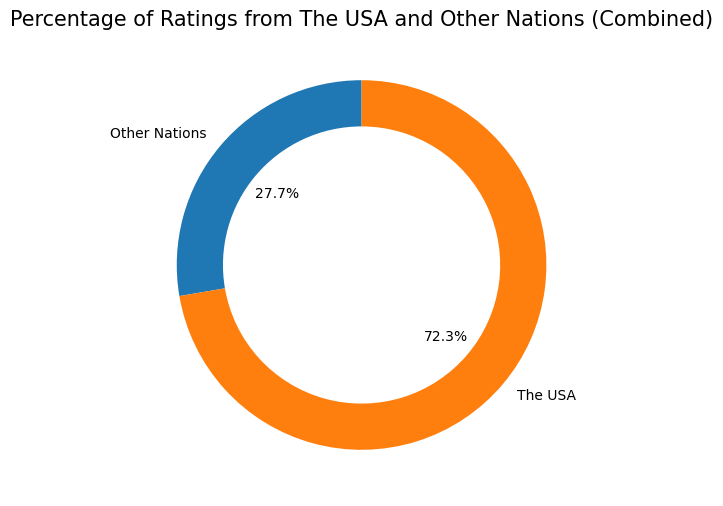

In [76]:
labels=['Other Nations', 'The USA']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([len(location_df[location_df!='usa']), len(location_df[location_df=='usa'])], labels=labels, autopct='%1.1f%%',
       wedgeprops={'width':0.25}, startangle=90)
ax.set_title('Percentage of Ratings from The USA and Other Nations (Combined)', fontsize=15)
plt.show()

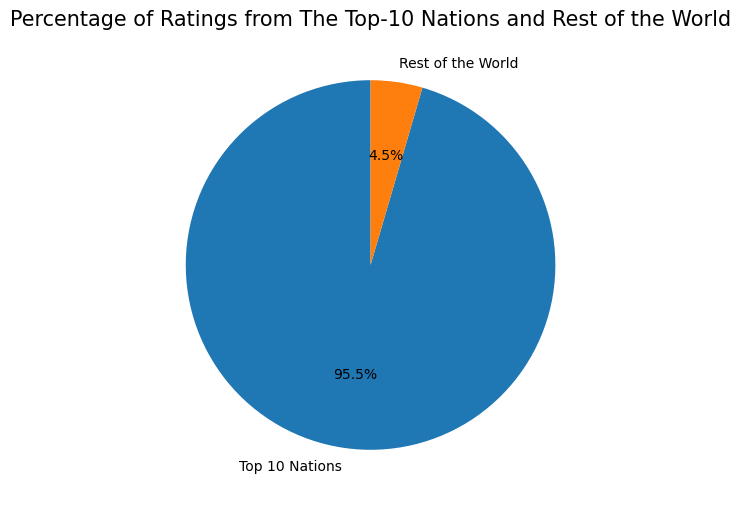

In [77]:
labels=['Top 10 Nations', 'Rest of the World']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([len(location_df[location_df.isin(list(location_df.value_counts()[0:10].keys()))]), 
        len(location_df[~location_df.isin(list(location_df.value_counts()[0:10].keys()))])], labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Percentage of Ratings from The Top-10 Nations and Rest of the World', fontsize=15)
plt.show()

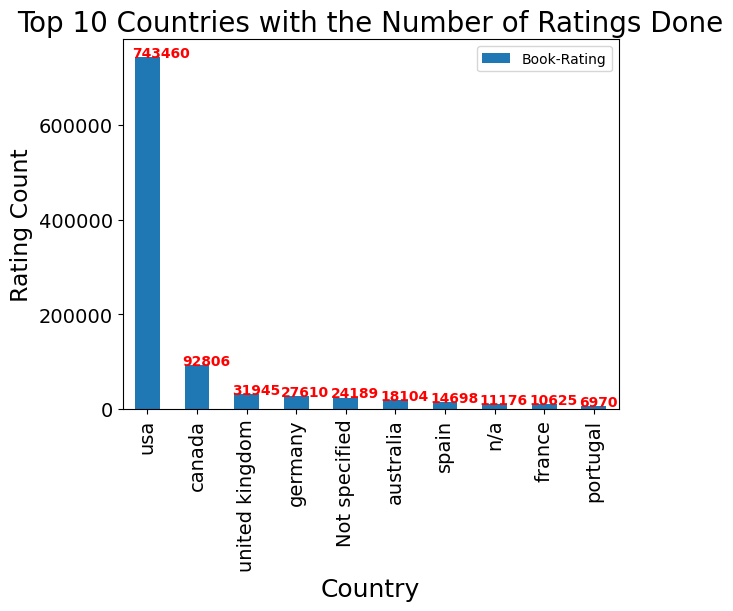

In [78]:
high_ratings=df.groupby('Country')[['Book-Rating']].count()
high_ratings=high_ratings.nlargest(10,columns='Book-Rating')
high_ratings.plot(kind='bar')

plt.title("Top 10 Countries with the Number of Ratings Done", fontsize=20)
plt.xlabel('Country', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Rating Count', fontsize=17)
plt.yticks(np.arange(0,800000,200000), fontsize=14)

for index, value in enumerate(list(df['Country'].value_counts()[0:10].values)):
  plt.text(index-0.3, value+40, str(value), color = 'red', fontweight = 'bold', fontsize = 10)
plt.show()

In [79]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Location', 'Age', 'Country', 'Age_group'],
      dtype='object')

(<Figure size 1000x600 with 1 Axes>,
 <AxesSubplot: xlabel='Age_group', ylabel='count'>)

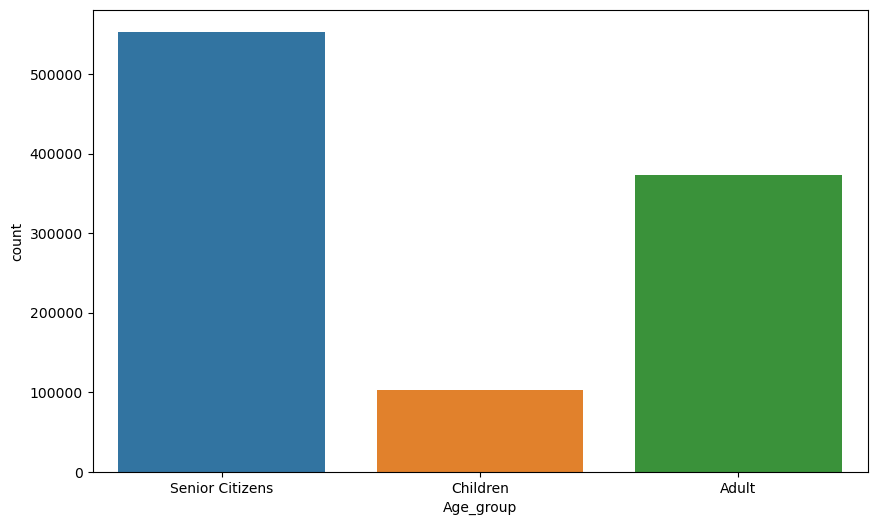

In [80]:
fig=plt.figure(figsize=(10,6))
fig,sns.countplot(df['Age_group'])

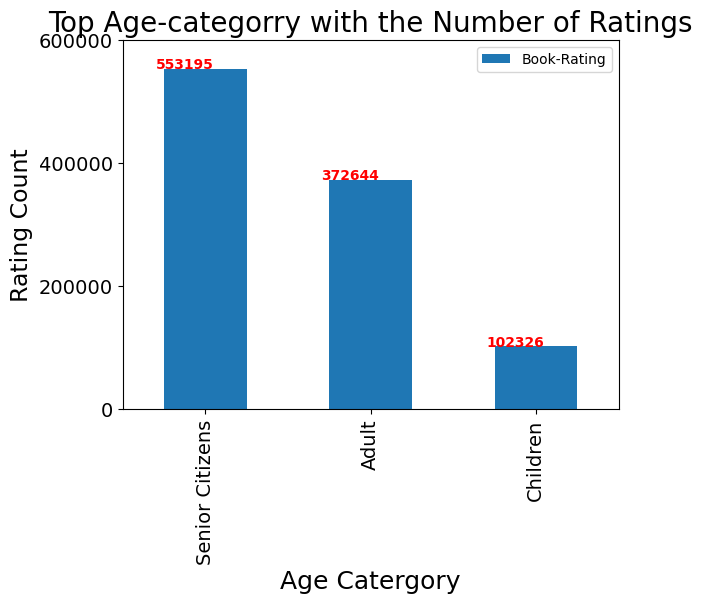

In [81]:
high_ratings=df.groupby('Age_group')[['Book-Rating']].count()
high_ratings=high_ratings.nlargest(10,columns='Book-Rating')
high_ratings.plot(kind='bar')

plt.title("Top Age-categorry with the Number of Ratings", fontsize=20)
plt.xlabel('Age Catergory', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Rating Count', fontsize=17)
plt.yticks(np.arange(0,800000,200000), fontsize=14)

for index, value in enumerate(list(df['Age_group'].value_counts()[0:10].values)):
  plt.text(index-0.3, value+40, str(value), color = 'red', fontweight = 'bold', fontsize = 10)
plt.show()

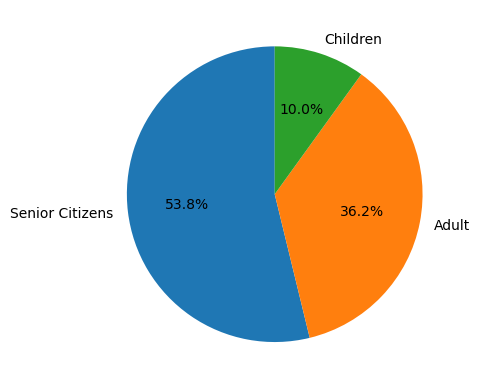

In [82]:
labels = df['Age_group'].value_counts().index
plt.pie(df['Age_group'].value_counts(),labels=labels,autopct='%1.1f%%', startangle=90);

# WORK CLOUD

In [83]:
from wordcloud import WordCloud
def create_wordcloud(df):
    wordcloud = WordCloud(
        width=1500,
        height=800,
        min_font_size=12,
        background_color='white'
    ).generate(df)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

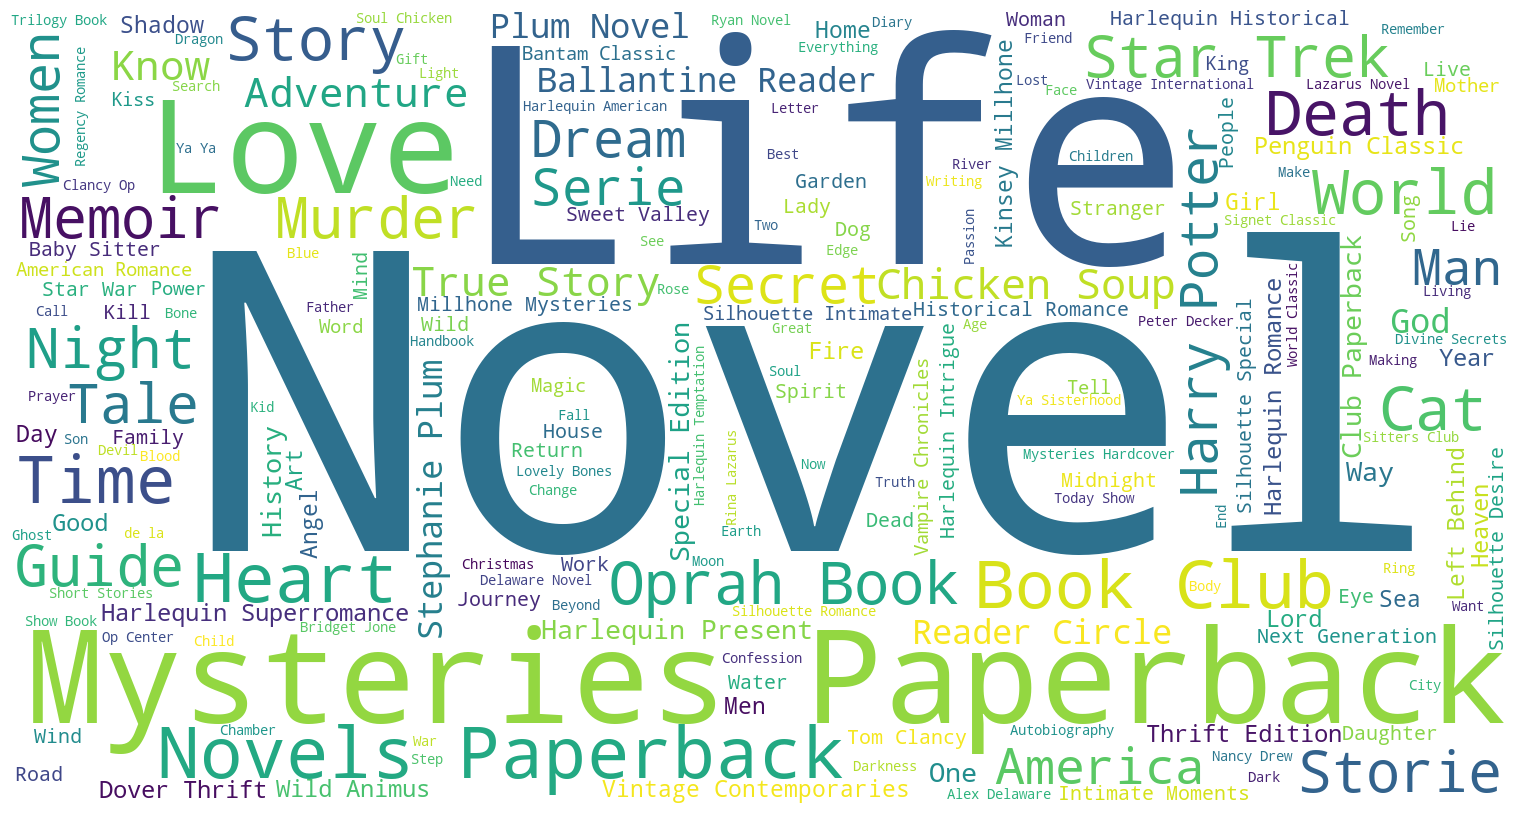

In [84]:
book_joined=' '.join(df['Book-Title'])
create_wordcloud(book_joined)

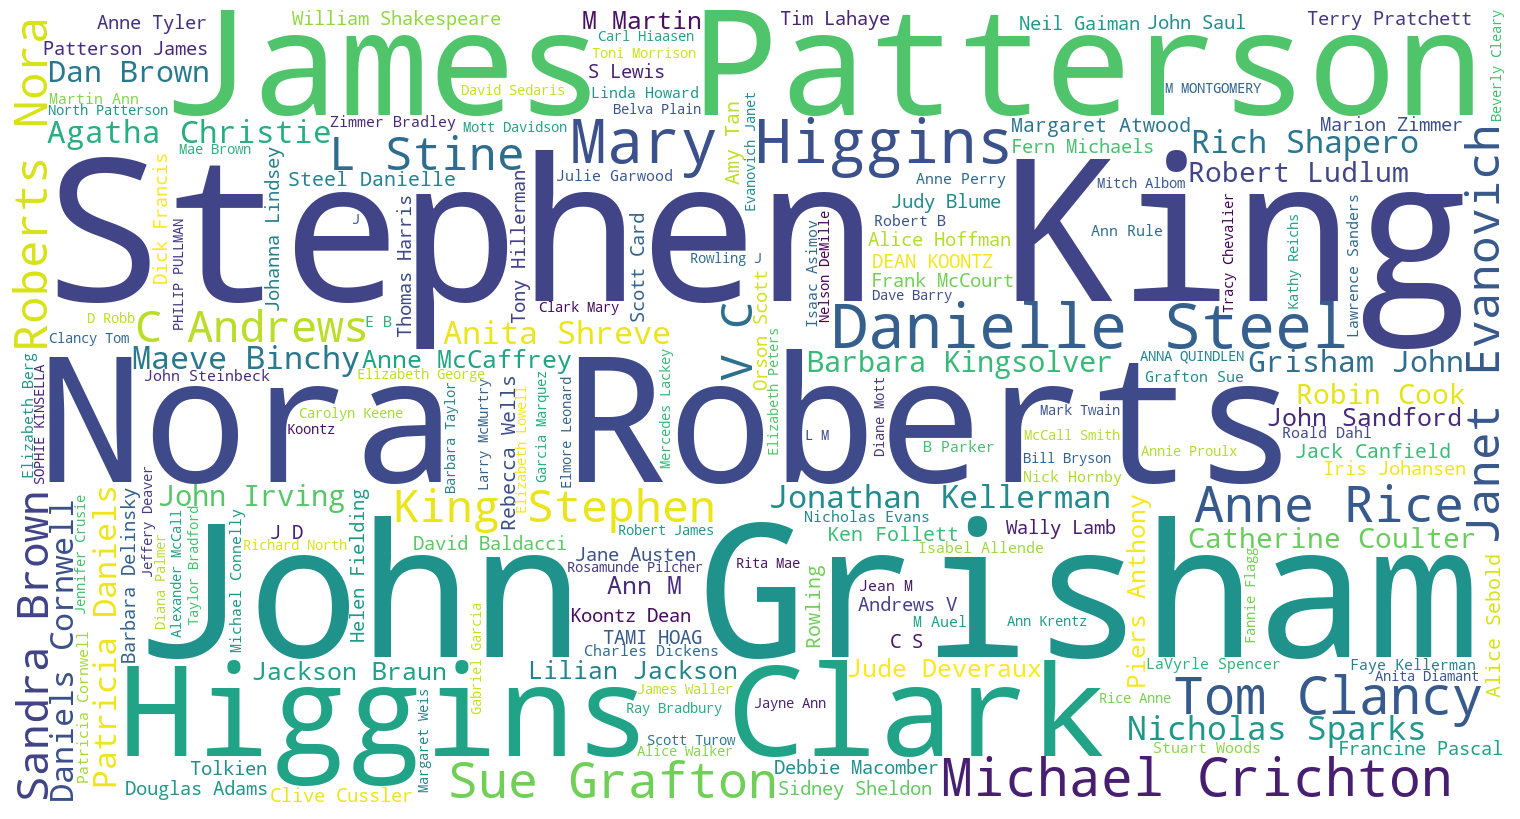

In [85]:
author_joined=' '.join(df['Book-Author'])
create_wordcloud(author_joined)

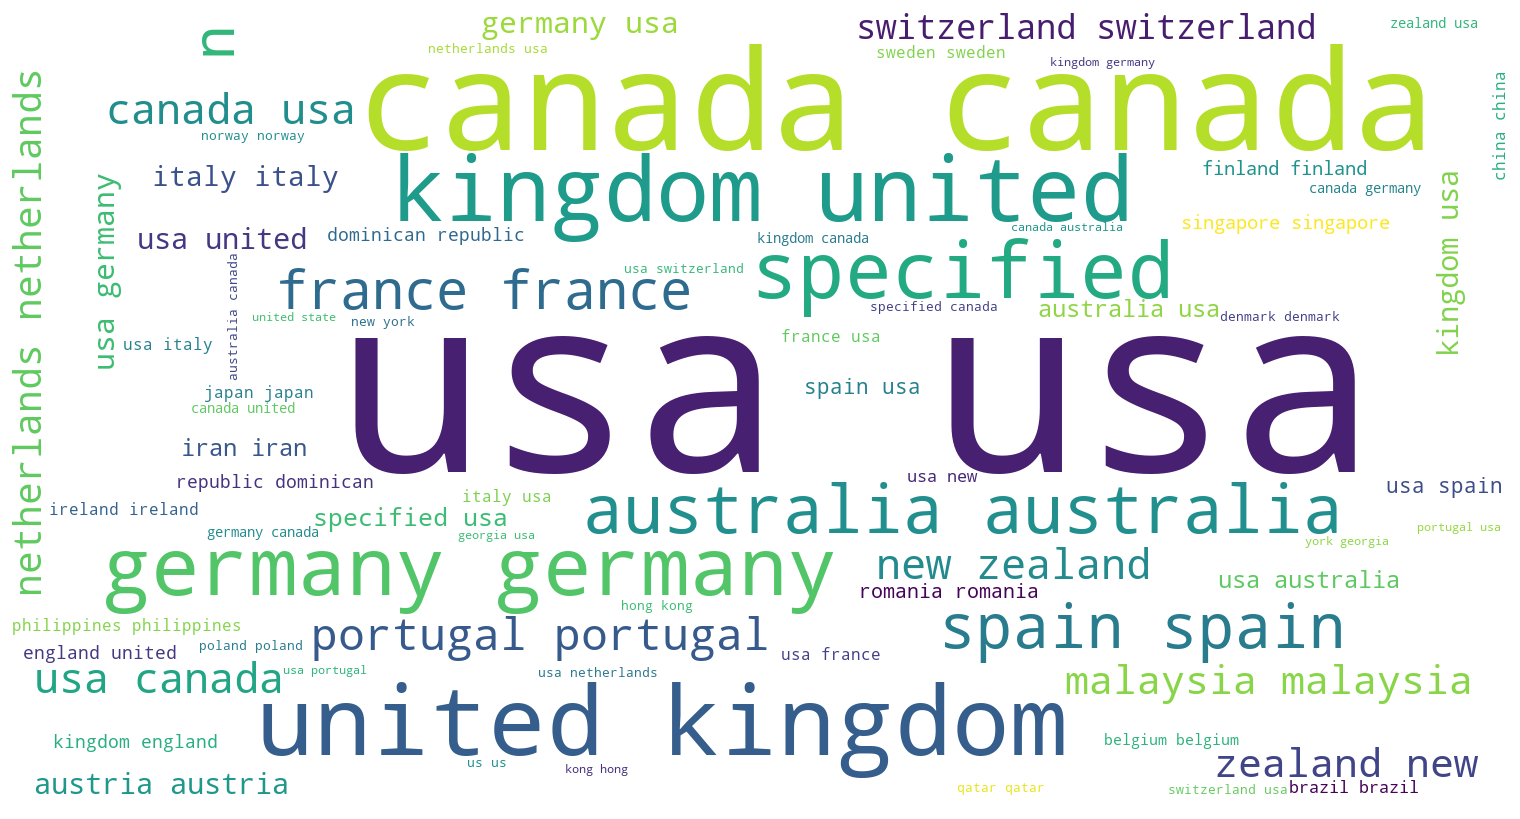

In [86]:
country_joined=' '.join(df['Country'])
create_wordcloud(country_joined)

# No of books published as per year

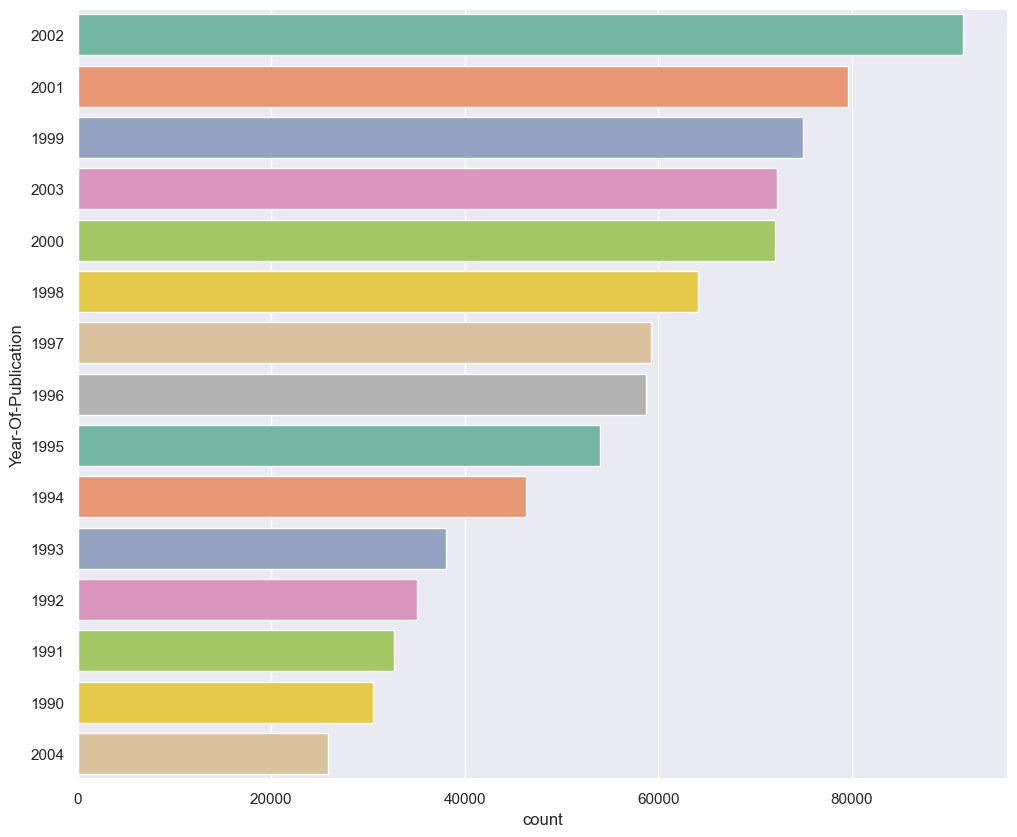

In [87]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y=df['Year-Of-Publication'], data=df, palette="Set2", order=df['Year-Of-Publication'].value_counts().index[0:15])

#### -> Most no of books got published in year 2002

# Popularity Based Recommender System

In [88]:
# Average rating given to books
df.groupby('Book-Title')['Book-Rating'].agg('mean')

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    2.250000
 Always Have Popsicles                                                                                        0.000000
 Apple Magic (The Collector's series)                                                                         0.000000
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         8.000000
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   0.000000
                                                                                                                ...   
Ã?Â?lpiraten.                                                                                                 0.000000
Ã?Â?rger mit Produkt X. Roman.                                                                                5.250000
Ã?Â?sterlich leben.                  

In [89]:
# Number of times rating given to a book
df.groupby('Book-Title')['Book-Rating'].count()

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    4
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
                                                                                                             ..
Ã?Â?lpiraten.                                                                                                 2
Ã?Â?rger mit Produkt X. Roman.                                                                                4
Ã?Â?sterlich leben.                                                                          

In [90]:
a = pd.array(df.groupby('Book-Title')['Book-Rating'].count())
b=pd.array(df.groupby('Book-Title')['Book-Rating'].agg('mean')) 

In [91]:
Ratings = pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].agg('mean')).iloc[:,1:]
Ratings['Avg_Book-Title'] = b
Ratings['No_times_rated'] = a 
Ratings

,Avg_Book-Title,No_times_rated
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000,4
Always Have Popsicles,0.000000,1
Apple Magic (The Collector's series),0.000000,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000,1
...,...,...
Ã?Â?lpiraten.,0.000000,2
Ã?Â?rger mit Produkt X. Roman.,5.250000,4
Ã?Â?sterlich leben.,7.000000,1


#### Books with fewer than 200 ratings will not be considered further in our process. Because books rated less than 200 times will not give us the proper view for our popularity-based recommender system

In [92]:
popular_books = Ratings[Ratings["No_times_rated"]>=200].sort_values("Avg_Book-Title",ascending=False)

In [96]:
popular_books.head(11)

,Avg_Book-Title,No_times_rated
Book-Title,,
Harry Potter and the Prisoner of Azkaban (Book 3),5.838028,426
Harry Potter and the Goblet of Fire (Book 4),5.807792,385
Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
Harry Potter and the Order of the Phoenix (Book 5),5.515942,345
Ender's Game (Ender Wiggins Saga (Paperback)),5.441296,247
Harry Potter and the Chamber of Secrets (Book 2),5.187726,554
The Hobbit : The Enchanting Prelude to The Lord of the Rings,5.025000,280
"The Fellowship of the Ring (The Lord of the Rings, Part 1)",4.948370,368
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),4.897033,573


In [97]:
popular_df = popular_books.merge(books,on='Book-Title')
popular_df

,Book-Title,Avg_Book-Title,No_times_rated,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),5.838028,426,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),5.838028,426,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),5.838028,426,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),5.807792,385,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),5.807792,385,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...,...,...,...,...,...
1126,Slow Waltz in Cedar Bend,1.889796,245,0446516538,Robert James Waller,1993,Warner Books,http://images.amazon.com/images/P/0446516538.0...,http://images.amazon.com/images/P/0446516538.0...,http://images.amazon.com/images/P/0446516538.0...
1127,Slow Waltz in Cedar Bend,1.889796,245,074932032X,Robert James Waller,1995,Mandarin,http://images.amazon.com/images/P/074932032X.0...,http://images.amazon.com/images/P/074932032X.0...,http://images.amazon.com/images/P/074932032X.0...
1128,Slow Waltz in Cedar Bend,1.889796,245,0749317647,Robert James Waller,1995,Mandarin,http://images.amazon.com/images/P/0749317647.0...,http://images.amazon.com/images/P/0749317647.0...,http://images.amazon.com/images/P/0749317647.0...
1129,Songs in Ordinary Time (Oprah's Book Club (Pap...,1.857759,232,0140244824,Mary McGarry Morris,1996,Penguin Books,http://images.amazon.com/images/P/0140244824.0...,http://images.amazon.com/images/P/0140244824.0...,http://images.amazon.com/images/P/0140244824.0...


#### As we can see from our Popular_df, Harry Potter and the Goblet of Fire (Book 4) has a different ISBN but the book title is the same, indicating that there are duplicate values in our Popular_df as well, which is bad for our popularity-based recommender system.

In [98]:
popular_books.columns

Index(['Avg_Book-Title', 'No_times_rated'], dtype='object')

In [101]:
popular_df.drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','No_times_rated','Avg_Book-Title']].head(11)

,Book-Title,Book-Author,Image-URL-M,No_times_rated,Avg_Book-Title
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,426,5.838028
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,385,5.807792
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,345,5.515942
13,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,http://images.amazon.com/images/P/0312853238.0...,247,5.441296
17,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,554,5.187726
20,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,280,5.025000
21,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
30,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,573,4.897033
32,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769


In [108]:
popular_df['Image-URL-M'].head(11)

0     http://images.amazon.com/images/P/0439136350.0...
1     http://images.amazon.com/images/P/0439136369.0...
2     http://images.amazon.com/images/P/0786222743.0...
3     http://images.amazon.com/images/P/0439139597.0...
4     http://images.amazon.com/images/P/0439139600.0...
5     http://images.amazon.com/images/P/0590353403.0...
6     http://images.amazon.com/images/P/043936213X.0...
7     http://images.amazon.com/images/P/043920352X.0...
8     http://images.amazon.com/images/P/043936213X.0...
9     http://images.amazon.com/images/P/043935806X.0...
10    http://images.amazon.com/images/P/0439567610.0...
Name: Image-URL-M, dtype: object

# Data - Preprocessing

In [109]:
x = df.groupby("User-ID").count()["Book-Rating"]>50

In [110]:
x_table = x[x].index

In [111]:
updated_rating = df[df["User-ID"].isin(x_table)]

In [112]:
updated_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,Country,Age_group
413,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,"barcelona, barcelona, spain",22.0,spain,Children
414,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",Marian Keyes,2003,William Morrow,http://images.amazon.com/images/P/0060520507.0...,http://images.amazon.com/images/P/0060520507.0...,http://images.amazon.com/images/P/0060520507.0...,"barcelona, barcelona, spain",22.0,spain,Children
415,276925,0060930934,0,Wasted : A Memoir of Anorexia and Bulimia,Marya Hornbacher,1999,Perennial,http://images.amazon.com/images/P/0060930934.0...,http://images.amazon.com/images/P/0060930934.0...,http://images.amazon.com/images/P/0060930934.0...,"barcelona, barcelona, spain",22.0,spain,Children
416,276925,0060951303,0,La casa de los espÃ­ritus,Isabel Allende,1995,Rayo,http://images.amazon.com/images/P/0060951303.0...,http://images.amazon.com/images/P/0060951303.0...,http://images.amazon.com/images/P/0060951303.0...,"barcelona, barcelona, spain",22.0,spain,Children
418,276925,0140154078,6,The Music of Chance,Paul Auster,1993,Penguin Books,http://images.amazon.com/images/P/0140154078.0...,http://images.amazon.com/images/P/0140154078.0...,http://images.amazon.com/images/P/0140154078.0...,"barcelona, barcelona, spain",22.0,spain,Children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149744,276688,0836236688,10,Dilbert: Seven Years Of Highly Defective Peopl...,Scott Adams,1997,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836236688.0...,http://images.amazon.com/images/P/0836236688.0...,http://images.amazon.com/images/P/0836236688.0...,"fort lee, new jersey, usa",45.0,usa,Senior Citizens
1149745,276688,0892966548,10,Killer Market: A Deborah Knott Mystery (Debora...,Margaret Maron,1997,Warner Books Inc,http://images.amazon.com/images/P/0892966548.0...,http://images.amazon.com/images/P/0892966548.0...,http://images.amazon.com/images/P/0892966548.0...,"fort lee, new jersey, usa",45.0,usa,Senior Citizens
1149746,276688,1551669315,6,The Third Wife,Jasmine Cresswell,2002,Mira,http://images.amazon.com/images/P/1551669315.0...,http://images.amazon.com/images/P/1551669315.0...,http://images.amazon.com/images/P/1551669315.0...,"fort lee, new jersey, usa",45.0,usa,Senior Citizens
1149747,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,"fort lee, new jersey, usa",45.0,usa,Senior Citizens


In [113]:
y = updated_rating.groupby("Book-Title").count()["Book-Rating"]>=50

In [114]:
final_ratings = y[y].index
final_ratings

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Writ of Execution', 'Wuthering Heights',
       'Wuthering Heights (Penguin Classics)', 'Year of Wonders',
       'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=1346)

In [115]:
final_ratings = updated_rating[updated_rating["Book-Title"].isin(final_ratings)]

In [116]:
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,Country,Age_group
413,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,"barcelona, barcelona, spain",22.0,spain,Children
419,276925,0140327592,0,Matilda,Roald Dahl,1990,Viking Penguin Inc,http://images.amazon.com/images/P/0140327592.0...,http://images.amazon.com/images/P/0140327592.0...,http://images.amazon.com/images/P/0140327592.0...,"barcelona, barcelona, spain",22.0,spain,Children
426,276925,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,"barcelona, barcelona, spain",22.0,spain,Children
429,276925,0385504209,8,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,"barcelona, barcelona, spain",22.0,spain,Children
453,276925,0804106304,0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,"barcelona, barcelona, spain",22.0,spain,Children


In [117]:
table = final_ratings.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating')

In [118]:
table.head()

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Writ of Execution,Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
243,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
table.fillna(0,inplace = True)

In [120]:
table

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Writ of Execution,Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Collaborative Recommender System Using Cosine Similarity - 1

In [121]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from sklearn.metrics.pairwise import cosine_similarity

In [122]:
user_sim = 1 - pairwise_distances(table.values,metric = 'cosine')

In [123]:
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.05050607,
        0.        ],
       [0.        , 1.        , 0.23057647, ..., 0.        , 0.        ,
        0.09703821],
       [0.        , 0.23057647, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.05050607, 0.        , 0.        , ..., 0.        , 1.        ,
        0.09032259],
       [0.        , 0.09703821, 0.        , ..., 0.        , 0.09032259,
        1.        ]])

In [124]:
# Filling those diagonal values with 0
np.fill_diagonal(user_sim,0)

In [125]:
# Storing the results in a DataFrame
user_sim_df = pd.DataFrame(user_sim)

In [126]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940
0,0.000000,0.000000,0.000000,0.116825,0.0,0.0,0.000000,0.0,0.00000,0.159287,...,0.000000,0.000000,0.062834,0.000000,0.0,0.0,0.000000,0.0,0.050506,0.000000
1,0.000000,0.000000,0.230576,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.097038
2,0.000000,0.230576,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.116825,0.000000,0.000000,0.000000,0.0,0.0,0.126278,0.0,0.11995,0.061923,...,0.000000,0.050925,0.000000,0.071294,0.0,0.0,0.065054,0.0,0.096340,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2937,0.000000,0.000000,0.000000,0.065054,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.118480,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2938,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.149551,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2939,0.050506,0.000000,0.000000,0.096340,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.090323


In [127]:
# Setting the index and column names to user ID's
user_sim_df.index = list(table.index)
user_sim_df.columns = list(table.index)

In [128]:
user_sim_df

,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
243,0.000000,0.000000,0.000000,0.116825,0.0,0.0,0.000000,0.0,0.00000,0.159287,...,0.000000,0.000000,0.062834,0.000000,0.0,0.0,0.000000,0.0,0.050506,0.000000
254,0.000000,0.000000,0.230576,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.097038
507,0.000000,0.230576,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
638,0.116825,0.000000,0.000000,0.000000,0.0,0.0,0.126278,0.0,0.11995,0.061923,...,0.000000,0.050925,0.000000,0.071294,0.0,0.0,0.065054,0.0,0.096340,0.000000
643,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278188,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
278418,0.000000,0.000000,0.000000,0.065054,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.118480,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
278582,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.149551,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
278633,0.050506,0.000000,0.000000,0.096340,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.090323


In [129]:
#finding users with high similarity between them
user = []
user1 = []
similar = []

for cols in user_sim_df.columns:
    for rows in user_sim_df.index:
        if user_sim_df[cols][rows] > 0.01 :
            user.append(cols)
            user1.append(rows)
            similar.append(user_sim_df[cols][rows])
           

In [130]:
similar_users = pd.DataFrame()

similar_users['user'] = user
similar_users['user1'] = user1
similar_users['similarity'] = similar 

In [131]:
similarity_scores = cosine_similarity(table)
similarity_scores.shape

(2941, 2941)

In [132]:
similar_users 

,user,user1,similarity
0,243,638,0.116825
1,243,1424,0.159287
2,243,1435,0.196229
3,243,4017,0.072138
4,243,5903,0.107988
...,...,...,...
1107403,278843,277195,0.132020
1107404,278843,277378,0.154287
1107405,278843,277928,0.125373
1107406,278843,277965,0.115069


In [133]:
similar_users.sort_values(by=['similarity'], ascending=False).head(80)

,user,user1,similarity
1097198,275239,14232,1.0
310487,79506,56360,1.0
617312,153621,215953,1.0
617309,153621,197550,1.0
617290,153621,132492,1.0
...,...,...,...
549210,137006,145198,1.0
706336,177180,257198,1.0
232481,58961,2358,1.0
996828,249791,211847,1.0


In [134]:
df[(df['User-ID']==9141) | (df['User-ID']==77039)] # similarity = 1

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,Country,Age_group
38239,9141,006019328X,0,"Plato, Not Prozac! Applying Philosophy to Ever...",Lou Marinoff,1999,HarperCollins Publishers,http://images.amazon.com/images/P/006019328X.0...,http://images.amazon.com/images/P/006019328X.0...,http://images.amazon.com/images/P/006019328X.0...,"durango, colorado, usa",65.0,usa,Senior Citizens
38240,9141,0060509171,0,City of the Beasts,Isabel Allende,2002,HarperCollins,http://images.amazon.com/images/P/0060509171.0...,http://images.amazon.com/images/P/0060509171.0...,http://images.amazon.com/images/P/0060509171.0...,"durango, colorado, usa",65.0,usa,Senior Citizens
38241,9141,006064589x,0,The Dance of the Dissident Daughter,Sue Monk Kidd,1996,HarperSanFrancisco,http://images.amazon.com/images/P/006064589X.0...,http://images.amazon.com/images/P/006064589X.0...,http://images.amazon.com/images/P/006064589X.0...,"durango, colorado, usa",65.0,usa,Senior Citizens
38242,9141,0060915544,0,The Bean Trees,Barbara Kingsolver,1989,Perennial,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...,"durango, colorado, usa",65.0,usa,Senior Citizens
38243,9141,0060928336,0,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,"durango, colorado, usa",65.0,usa,Senior Citizens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324373,77039,8483062461,0,Manhattan Transfer,John Roderigo Dos Passos,2000,Debate,http://images.amazon.com/images/P/8483062461.0...,http://images.amazon.com/images/P/8483062461.0...,http://images.amazon.com/images/P/8483062461.0...,"barcelona, catalunya, spain",35.0,spain,Adult
324374,77039,8495359537,0,Sin Destino,Imre Kertesz,2001,El Acantilado,http://images.amazon.com/images/P/8495359537.0...,http://images.amazon.com/images/P/8495359537.0...,http://images.amazon.com/images/P/8495359537.0...,"barcelona, catalunya, spain",35.0,spain,Adult
324375,77039,8495501198,0,Memorias de una geisha,Arthur Golden,2001,Suma de Letras,http://images.amazon.com/images/P/8495501198.0...,http://images.amazon.com/images/P/8495501198.0...,http://images.amazon.com/images/P/8495501198.0...,"barcelona, catalunya, spain",35.0,spain,Adult
324376,77039,8495501783,8,El Cielo Protector,Paul Bowles,2001,Suma de Letras,http://images.amazon.com/images/P/8495501783.0...,http://images.amazon.com/images/P/8495501783.0...,http://images.amazon.com/images/P/8495501783.0...,"barcelona, catalunya, spain",35.0,spain,Adult


# Collaborative Filtering Based Recommender System - 2

In [135]:
DF_X = df.groupby('User-ID').count()['Book-Rating'] > 50
DF_X = DF_X[DF_X].index

In [136]:
rating_2 = df[df['User-ID'].isin(DF_X)]

In [137]:
DF_Y = rating_2.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = DF_Y[DF_Y].index

In [138]:
final_ratings_report = rating_2[rating_2['Book-Title'].isin(famous_books)]

In [139]:
pivot_table = final_ratings_report.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [140]:
pivot_table.fillna(0,inplace=True)

In [141]:
similarity_scores_2 = cosine_similarity(pivot_table)
similarity_scores_2.shape

(1346, 1346)

In [142]:
def recommend(book_name):
    # index fetch
    index = np.where(pivot_table.index==book_name)
    similar_items = sorted(list(enumerate(similarity_scores_2[0])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        print(pivot_table.index[i[0]])

In [143]:
recommend('We, the Balts')

Animal Farm
Brave New World
American Psycho (Vintage Contemporaries)
The Vampire Lestat (Vampire Chronicles, Book II)
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death
